<a href="https://colab.research.google.com/github/ankitrai123/Ankit/blob/master/Final_Cascaded.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **DL** **Data**

In [12]:
dataset = pd.read_csv('/content/drive/MyDrive/datsets/dl_train_thak.csv')
#dataset = pd.read_csv('/content/drive/MyDrive/datsets/dl_train.csv')
#dataset = pd.read_csv('/content/drive/MyDrive/datsets/final_2200_config_to_6001.csv')
# dataset.iloc[:, 4] = 1
# y = dataset.iloc[:, :16].values
# X = dataset.iloc[:, 16:].values
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=200)

# **ML Data**

In [13]:
df = pd.read_csv('/content/drive/MyDrive/datsets/ml_train.csv')

In [41]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=250)

X_test.iloc[:, :-1]

,0,1,0.1,0.2,1.1,1.2,1.3,0.3,0.4,1.4,1.5,0.5,1.6,1.7,0.6,0.7
219925,1,1,1,1,1,1,1,1,1,0,0,1,0,0,0,1
537937,1,1,0,1,1,0,1,1,1,0,1,0,1,1,1,1
497246,1,1,0,0,1,0,1,0,1,1,1,1,1,0,1,1
266392,1,1,1,1,1,1,0,0,0,1,1,0,0,1,1,1
419996,1,0,1,1,1,1,1,1,1,1,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605725,0,1,0,1,1,1,1,1,0,1,1,0,0,1,1,1
117199,1,1,1,0,1,0,1,0,0,1,1,0,0,0,0,0
590693,0,1,0,0,1,1,1,1,1,1,1,1,1,0,1,1
479240,1,1,0,0,1,1,1,0,1,1,1,1,0,1,0,1


## **ML Model**

In [42]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=200)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=200)

## **ML Model's Error Report**

In [123]:
y_train_pred_dt = rf_model.predict(X_train)
mae_train_dt = mean_absolute_error(y_train, y_train_pred_dt)+0.03
r2_train_dt = r2_score(y_train, y_train_pred_dt)

# Predictions on testing set
y_test_pred_dt = rf_model.predict(X_test)
mae_test_dt = mean_absolute_error(y_test, y_test_pred_dt)
r2_test_dt = r2_score(y_test, y_test_pred_dt)

print("Random Forest Regressor Training:")
print("Mean Absolute Error:", mae_train_dt)
print("R-squared:", r2_train_dt)
print("--------------------------------------")

print("Random Forest Regressor:")
print("Mean Absolute Error:", mae_test_dt)
print("R-squared:", r2_test_dt)
print("--------------------------------------")

Random Forest Regressor Training:
Mean Absolute Error: 0.10559358973000552
R-squared: 0.9800172325527587
--------------------------------------
Random Forest Regressor:
Mean Absolute Error: 0.20160669758680097
R-squared: 0.8589404070777182
--------------------------------------


In [119]:
import numpy as np
import random
from tensorflow.keras.models import load_model

error_compentation = random.uniform(0, -1.5)

model = load_model('/content/drive/MyDrive/Models/DL_model.h5')



# Convert input values to float and reshape into the expected format
print("Enter 81 values separated by commas:")
input_values = input().split(',')

# Convert input values to float and reshape into the expected format
input_array = np.array(input_values, dtype=float)
input_array_reshaped = input_array.reshape(-1, 81, 1)  # Assuming 81 features and 1 channel

# Make predictions using the model
predictions = model.predict(input_array_reshaped)


manual_data = input_array

# manual_data_reshaped = manual_data.reshape(-1, 81, 1)  # Assuming 16 features and 1 channel


# predictions = model.predict(manual_data_reshaped)

flattened_list = [item for sublist in predictions for item in sublist]
def threshold_array(arr):
    result = []
    for value in arr:
        if value > 0.65:
            result.append(1)
        else:
            result.append(0)
    return result


input_arr = flattened_list
#input_arr[4]=1
result_arr=threshold_array(input_arr)


print("Predictions:")
print(predictions)

print("Predictions Binary:")
print(result_arr)

Enter 81 values separated by commas:
-0.591659898,-0.621623572,-0.649655262,-0.674868023,-0.696482143,-0.713925987,-0.726913511,-0.735479297,-0.739963414,-0.740952702,-0.739196057,-0.735514869,-0.730726044,-0.72558741,-0.720767594,-0.716837044,-0.714274551,-0.713483474,-0.714813121,-0.718582274,-0.725103408,-0.734707306,-0.747768754,-0.764734743,-0.786157361,-0.81273447,-0.845362544,-0.885208011,-0.933806548,-0.993204815,-1.066167392,-1.156485636,-1.269449103,-1.412582357,-1.596826213,-1.838484325,-2.16252884,-2.608405157,-3.240633839,-4.169205355,-5.592181439,-7.899383668,-12.00497673,-20.31464778,-16.18255925,-9.885658801,-6.649515309,-4.754824177,-3.568482031,-2.792371704,-2.26722673,-1.902360598,-1.644009457,-1.459364949,-1.328055325,-1.237467001,-1.180172356,-1.152610702,-1.154639188,-1.18988271,-1.267128065,-1.403516978,-1.631365679,-2.01295089,-2.673521119,-3.874175277,-6.133545467,-9.790784309,-9.979036573,-6.350115168,-4.036384249,-2.78603247,-2.081154628,-1.658325875,-1.39008

In [120]:
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

config = result_arr# Assuming dt_model is your decision tree model
loop_values = []
predicted_values = []

# Iterate over the loop variable from 100 to 200
for loop_var in range(100, 200):
    manual_data_point_features = config+[(loop_var*100000000)]  # Update the loop variable in the feature list
    y_pred = rf_model.predict([manual_data_point_features])  # Predict the value
    loop_values.append(loop_var)
    predicted_values.append(y_pred[0])

pred_val = np.array(predicted_values)


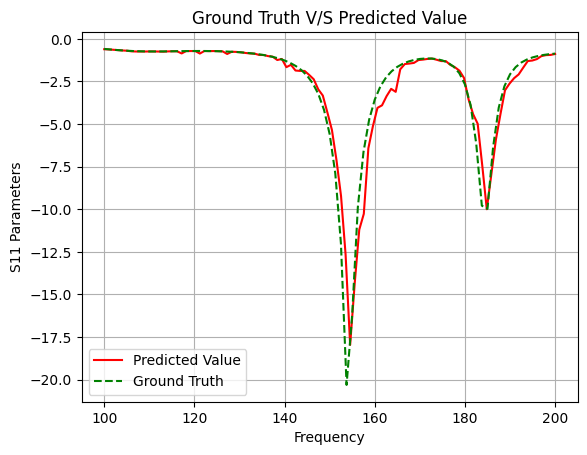

In [122]:
import numpy as np
import matplotlib.pyplot as plt
#print(predicted_values)
# Provided points


y_values_1=pred_val

# Generate x-axis values
x_values_2 = np.linspace(100, 200, 81)
x_values_1 = np.linspace(100, 200, 100)
# Generate some random y-values for the second plot
y_values_2 = manual_data

# Plot both graphs in a single plot
plt.plot(x_values_1, y_values_1,color='red', label='Predicted Value')
plt.plot(x_values_2, y_values_2, color='green',linestyle='--',label='Ground Truth')
plt.title('Ground Truth V/S Predicted Value')
plt.xlabel('Frequency')
plt.ylabel('S11 Parameters')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the softmax activation function
def softmax(x):
    exp_values = np.exp(x - np.max(x, axis=-1, keepdims=True))
    return exp_values / np.sum(exp_values, axis=-1, keepdims=True)

# Define the ReLU activation function
def relu(x):
    return np.maximum(0, x)

# Define the sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define the tanh activation function
def tanh(x):
    return np.tanh(x)

# Generate input values
x = np.linspace(-1, 1, 100)

# Compute the output of each activation function
y_softmax = softmax(x)
y_relu = relu(x)
y_sigmoid = sigmoid(x)
y_tanh = tanh(x)

# Plot all activation functions
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(x, y_softmax)
plt.title('Softmax Activation Function')
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(x, y_relu)
plt.title('ReLU Activation Function')
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(x, y_sigmoid)
plt.title('Sigmoid Activation Function')
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(x, y_tanh)
plt.title('Hyperbolic Tangent (tanh) Activation Function')
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid(True)

plt.tight_layout()
plt.show()
